# CAPÍTULO 01

## Estimativas de localização


### Exemplo 01: estimtivas de localização de população e taxas de homicídio


1. Criação do DataFrame

In [ ]:
import pandas as pd

df = pd.read_csv('../capitulo01/state.csv')

df


1. Média aritmética

In [ ]:
import numpy as np

media = np.mean(df['Population'])

media

2. Média aparada

In [ ]:
from scipy.stats import trim_mean

media_aparada = trim_mean(df['Population'],0.1)

media_aparada

3. Mediana

In [ ]:
mediana = np.median(df['Population'])

mediana

4. Media ponderada

In [ ]:
media_ponderada = np.average(df['Murder.Rate'], weights=df['Population'])

print(media_ponderada)


5. Mediana ponderada

In [ ]:
# Ordenar os valores
indices_ordenados = np.argsort(df['Murder.Rate'])
valores_ordenados = np.array(df['Murder.Rate'])[indices_ordenados]
pesos_ordenados = np.array(df['Population'])[indices_ordenados]

# Calcular a soma acumulada  dos pesos
soma_acumulada_pesos = np.cumsum(pesos_ordenados)

# Encontrar a posição onde a soma acumulada dos pesos excede a metade da soma total dos pesos
metade_soma_pesos = np.sum(df['Population']) / 2
mediana_ponderada = valores_ordenados[np.where(soma_acumulada_pesos >= metade_soma_pesos)[0][0]]

mediana_ponderada


## Estimativas de variabilidade

### Exemplo 02: estimativas de variabilidade de população estadual


1. Desvio-padrão

In [ ]:
desvio_padrao = np.std(df['Population'])

desvio_padrao

2. IQR (Amplitude)

In [ ]:
Q1 = np.percentile(df['Population'],25)
Q3 = np.percentile(df['Population'],75)

display(Q1)
display(Q3)

IQR = Q3 - Q1

IQR

3. Desvio absoluto mediano da mediana (MAD)

In [ ]:
# Calcular os desvios absolutos em relação à mediana

desvios_absolutos = np.abs(df['Population'] -  mediana)

display(desvios_absolutos)

# Calcular a MAD
mad = np.median(desvios_absolutos)

mad

## Explorando a distribuição de dados

### Exibindo percentis

In [ ]:
dados_percentis = {
    '5%': [np.percentile(df['Murder.Rate'], 5)],
    '25%': [np.percentile(df['Murder.Rate'], 25)],
    '50%': [np.percentile(df['Murder.Rate'], 50)],
    '75%': [np.percentile(df['Murder.Rate'], 75)],
    '95%': [np.percentile(df['Murder.Rate'], 95)]
}
percentis = pd.DataFrame(dados_percentis)

percentis

### Gráfico de caixa (Boxplot)


Text(0, 0.5, 'População (em milhões)')

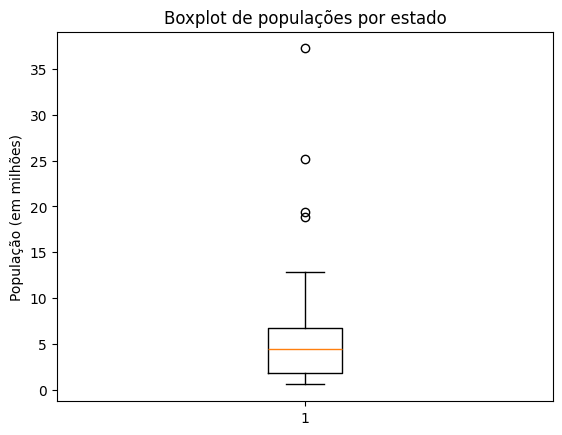

In [76]:
import matplotlib.pyplot as plt

# Criando o boxplot
plt.boxplot(df['Population']/1000000)

# Adcionando título e rótulo
plt.title('Boxplot de populações por estado')
plt.ylabel('População (em milhões)')